<a href="https://colab.research.google.com/github/FernandoSimon22/vision_artificial/blob/main/YOLOv8m_(monoclase).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Sep  8 19:53:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.9 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ultralytics/cfg/__init__.py", line 923, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.12/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ['val', 'track', 'predict', 'benchmark', 'export', 'train'].

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['detect', 'classify', 'obb', 'segment', 'pose']
                MODE (required) is one of ['val', 'track', 'predict', 'benchmark', 'export', 'train']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
      

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lX9sE2RPQOCv2R7cn0io")
project = rf.workspace("jota22").project("am_boundingbox")
version = project.version(22)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 69.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AM_BoundingBox-22 in yolov8:: 100%|██████████| 462/462 [00:00<00:00, 5187.57it/s]


In [ ]:
# Script para unificar clases específicas en archivos .txt de etiquetas YOLO
# Reemplaza: B -> burb, bbg -> Bg, D -> desp, MCu -> MdC, su -> surco, Poro -> Poro

import os
from glob import glob

# Definir el mapeo de clases antiguas (índices) a nuevas (índices unificados)
# Suponiendo el orden original en data.yaml, por ejemplo:
# 0: B, 1: Bg, 2: D, 3: MCu, 4: MdC, 5: Su, 6: bbg, 7: burb, 8: desp, 9: poro, 10: surco

class_map = {
    7: 0,  # B -> burb (índice 7)
    6: 1,  # bbg -> Bg (índice 1)
    8: 2,  # D -> desp (índice 8)
    4: 3,  # MCu -> MdC (índice 4)
    10: 5, # Su -> surco (índice 10)
    9: 9   # poro -> poro (se mantiene igual)
    # Otros índices no cambian
}

# Directorios con etiquetas
label_dirs = ["/content/Segmentacion_imagenes_AM3-6/train/labels", "/content/Segmentacion_imagenes_AM3-6/valid/labels", "/content/Segmentacion_imagenes_AM3-6/test/labels"]

def process_label_file(filepath, class_map):
    new_lines = []
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            new_class_id = class_map.get(class_id, class_id)  # Usa el nuevo id si existe, sino deja igual
            parts[0] = str(new_class_id)
            new_lines.append(" ".join(parts))
    with open(filepath, 'w') as f:
        f.write("\n".join(new_lines))

# Procesar cada archivo .txt
def unify_labels():
    for folder in label_dirs:
        if not os.path.exists(folder):
            continue
        label_files = glob(os.path.join(folder, "*.txt"))
        print(f"Procesando {len(label_files)} archivos en {folder}...")
        for file in label_files:
            process_label_file(file, class_map)
    print("✅ Reasignación de clases completada.")

# Ejecutar
unify_labels()



✅ Reasignación de clases completada.


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/AM_BoundingBox-22/data.yaml epochs=200, imgsz=768, batch=8, lr0=0.001, val=True

WARNING ⚠️ argument 'epochs=200,' does not require trailing comma ',', updating to 'epochs=200'.
WARNING ⚠️ argument 'imgsz=768,' does not require trailing comma ',', updating to 'imgsz=768'.
WARNING ⚠️ argument 'batch=8,' does not require trailing comma ',', updating to 'batch=8'.
WARNING ⚠️ argument 'lr0=0.001,' does not require trailing comma ',', updating to 'lr0=0.001'.
Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/AM_BoundingBox-22/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False,

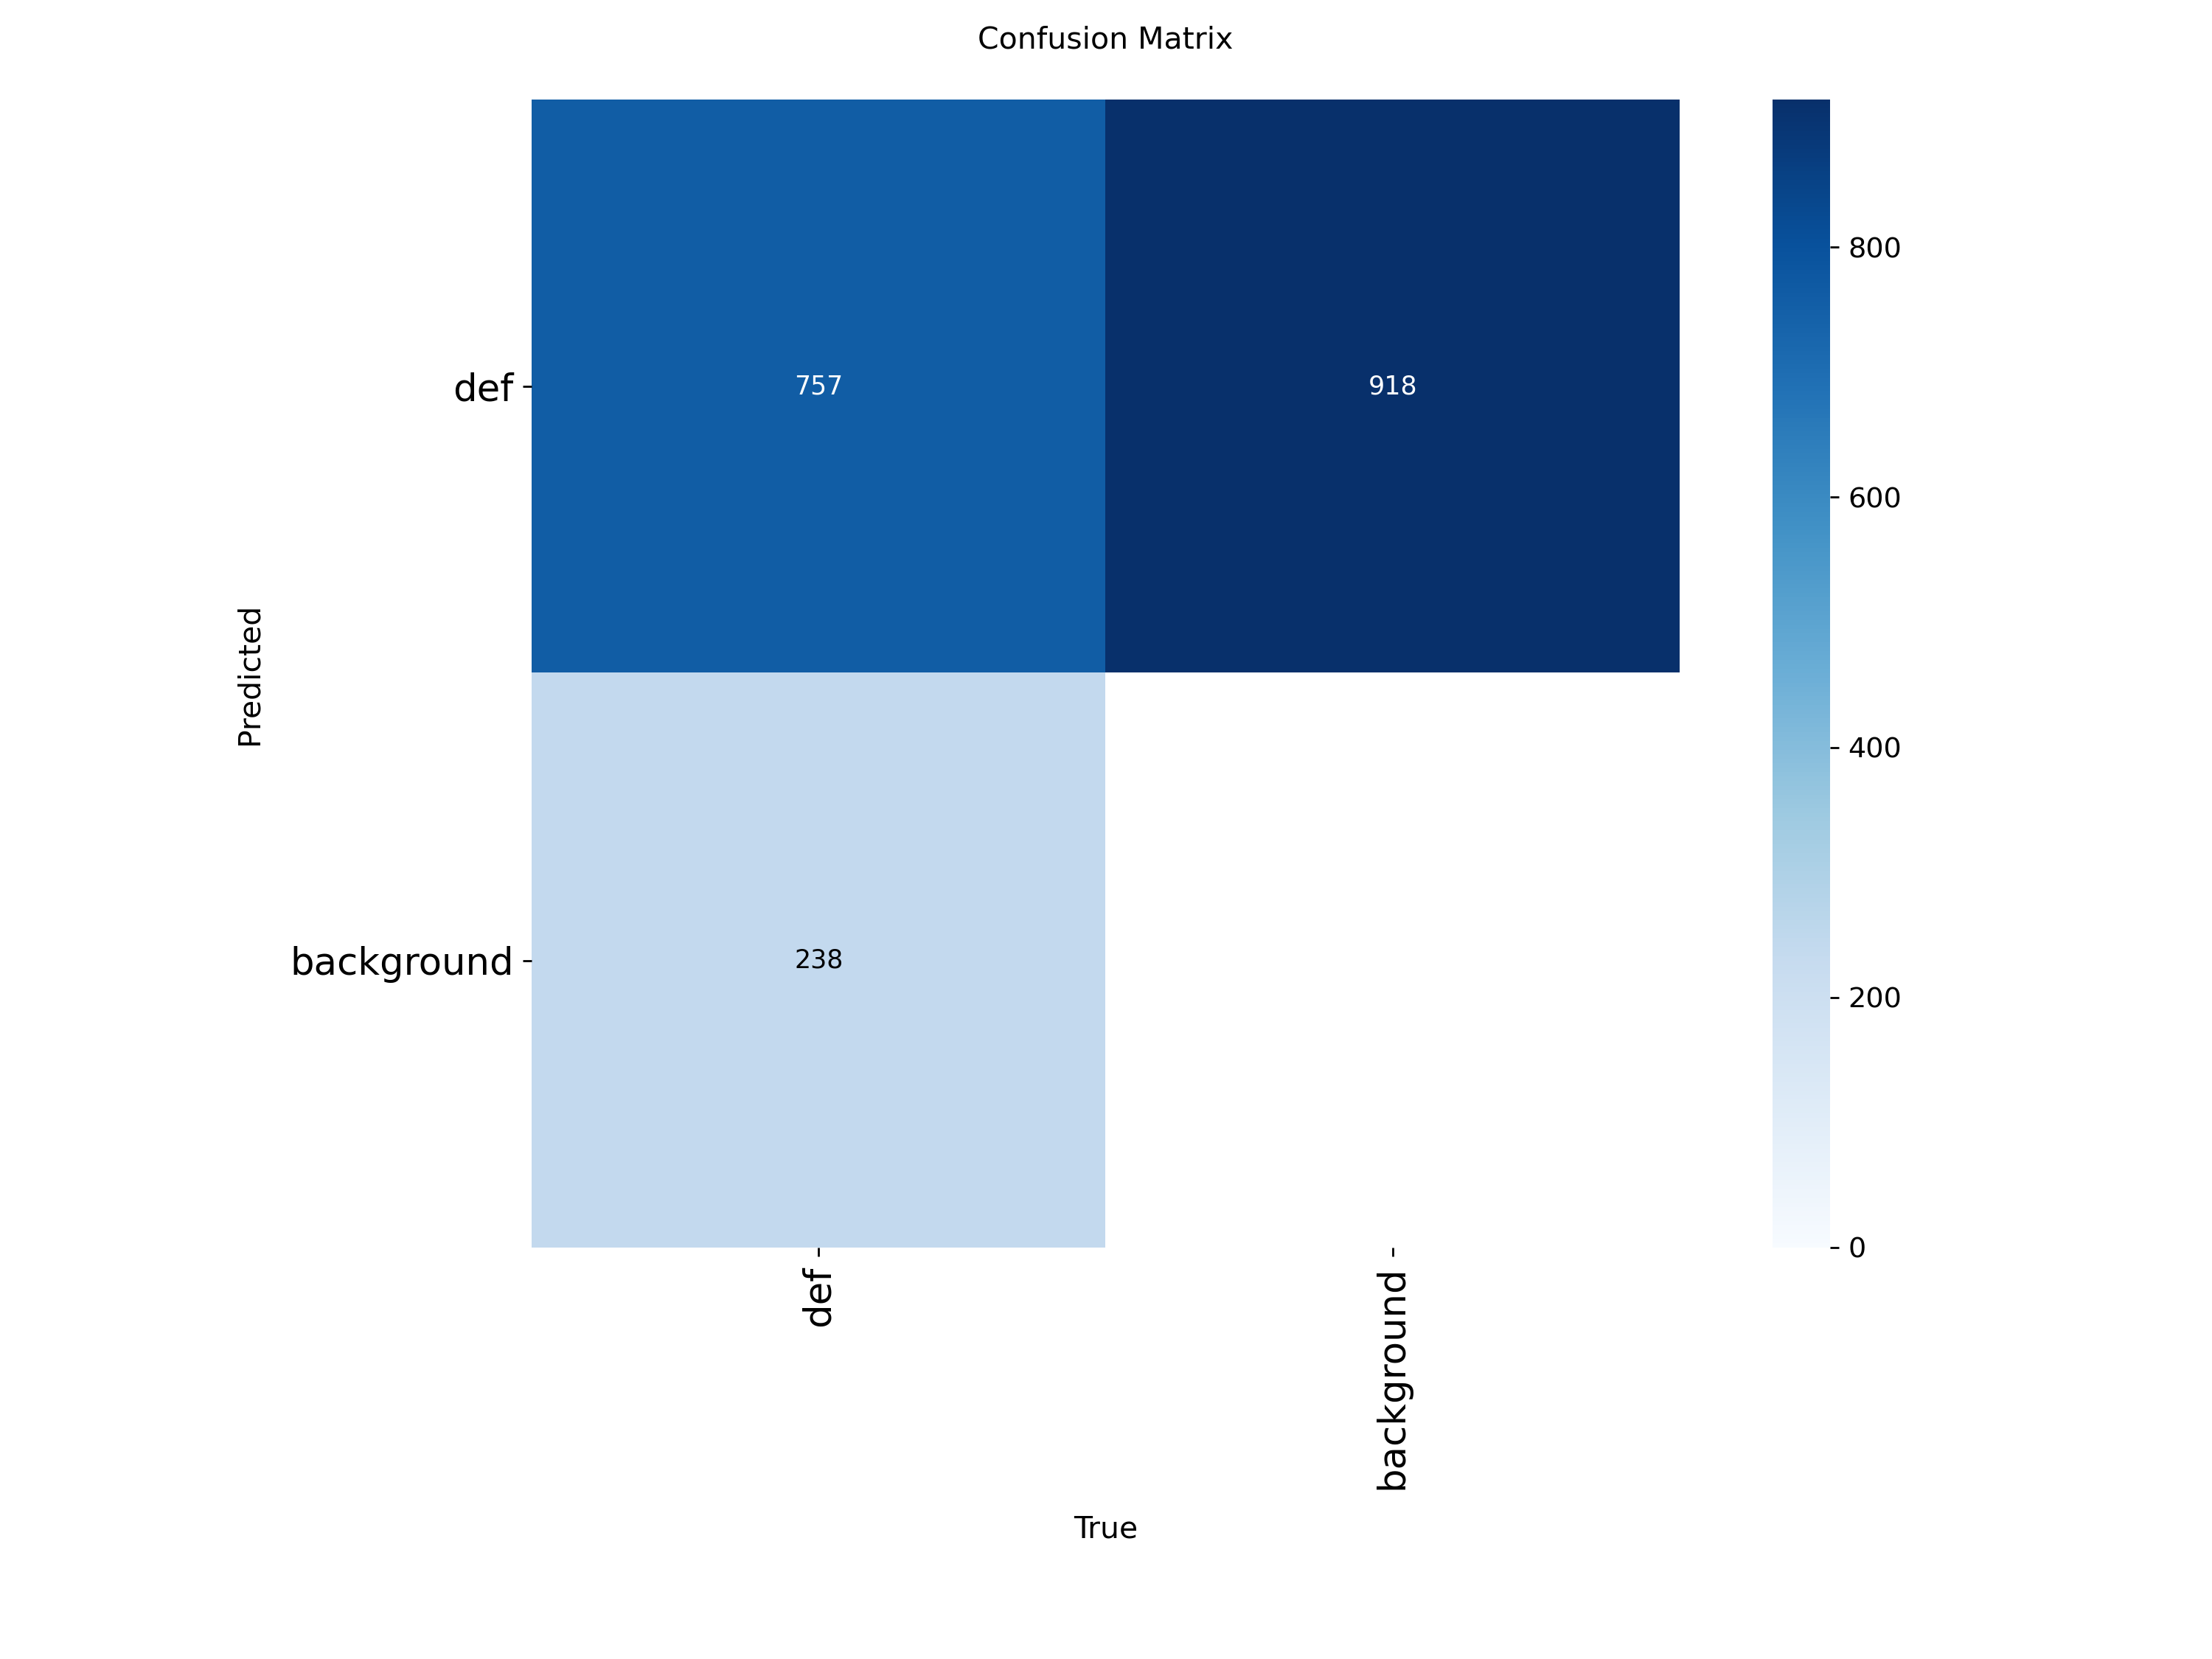

In [6]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

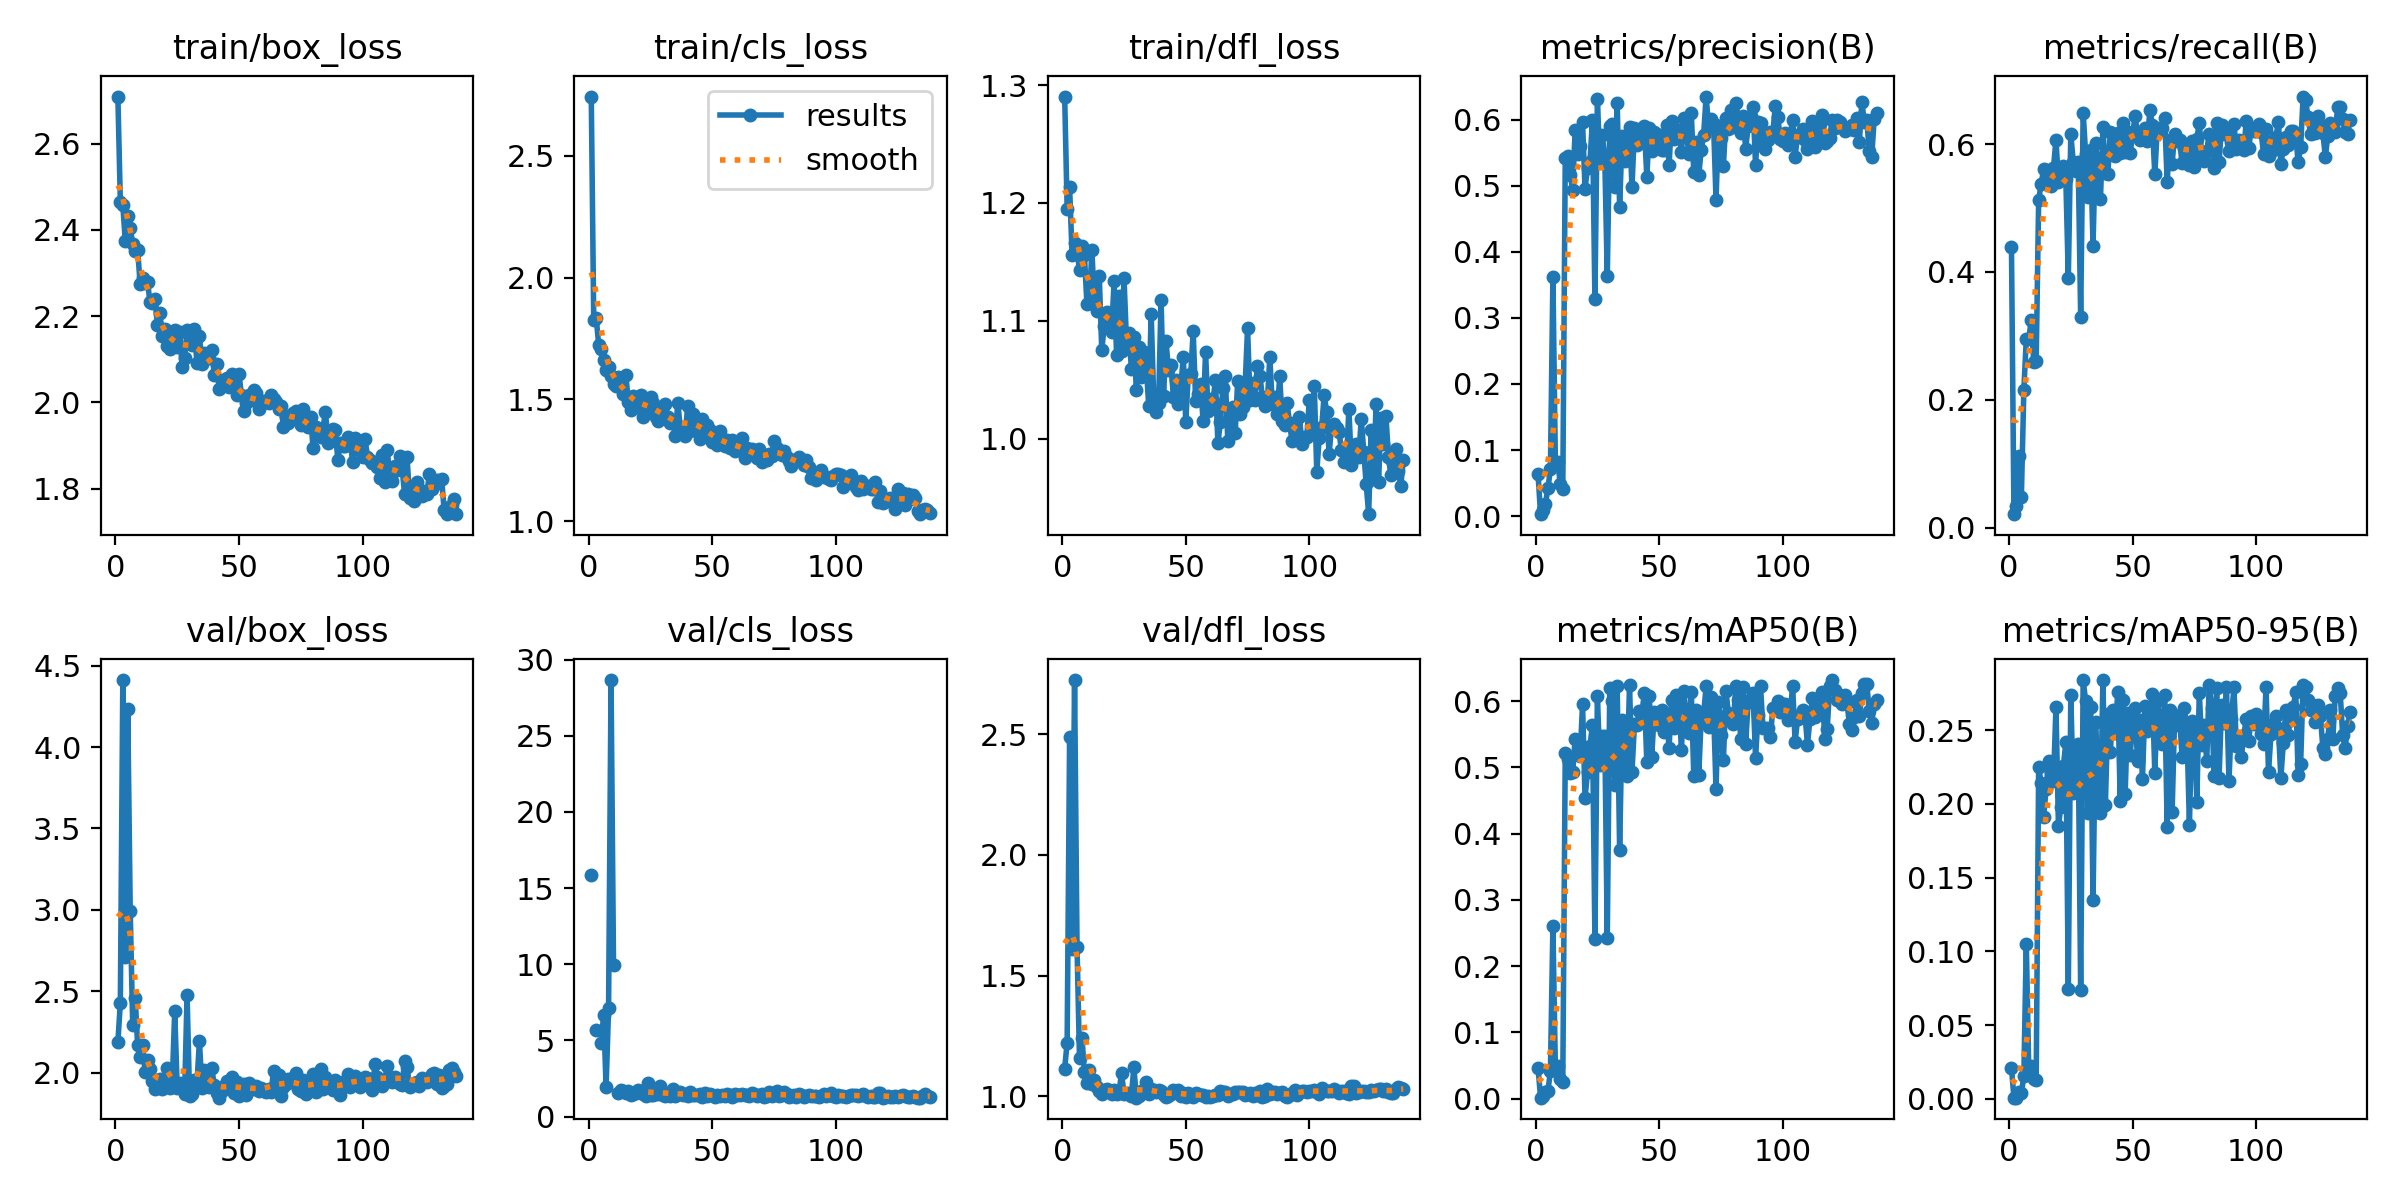

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/AM_BoundingBox-22/data.yaml

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1420.7±390.3 MB/s, size: 38.8 KB)
val: Scanning /content/AM_BoundingBox-22/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 23/23 381.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.4it/s 1.4s
                   all         23        995      0.589      0.624      0.623      0.283
Speed: 0.5ms preprocess, 41.9ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/AM_BoundingBox-22/test/images

Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/19 /content/AM_BoundingBox-22/test/images/03b55942-2_2_png.rf.d721f222016b28d9816d50c8ab0d4cd3.jpg: 768x768 26 defs, 47.3ms
image 2/19 /content/AM_BoundingBox-22/test/images/18a9bd68-6_95_png.rf.deee8ae7b93641b3a06e4fe3c98e7a01.jpg: 768x768 29 defs, 47.3ms
image 3/19 /content/AM_BoundingBox-22/test/images/5350952f-3_11_png.rf.a2b986bada8b9133f9254f8e18515e45.jpg: 768x768 104 defs, 47.2ms
image 4/19 /content/AM_BoundingBox-22/test/images/549e3e20-6_91_png.rf.fff6fce93929c24a5a8bc1051763a10d.jpg: 768x768 20 defs, 39.0ms
image 5/19 /content/AM_BoundingBox-22/test/images/565c696e-5_11_png.rf.9cb5665c98493e422a676294b62796aa.jpg: 768x768 65 defs, 39.0ms
image 6/19 /content/AM_BoundingBox-22/test/images/59298473-3_2_png.rf.572e0f5490d3c9315a5844ff1ab25d2e.jpg: 768x768 2 defs, 39.0ms
image 7/19 /content/AM_BoundingBox-22/

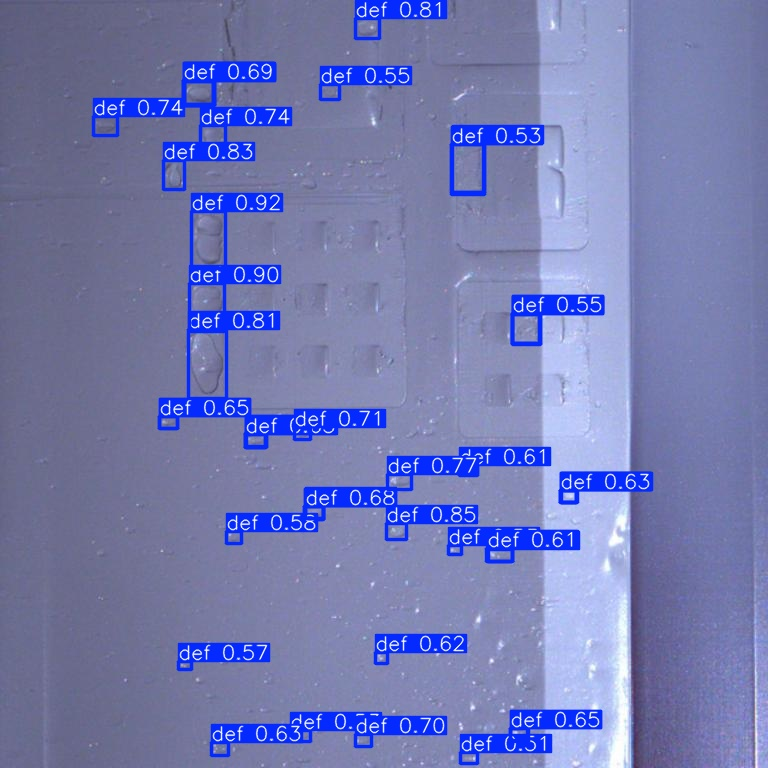

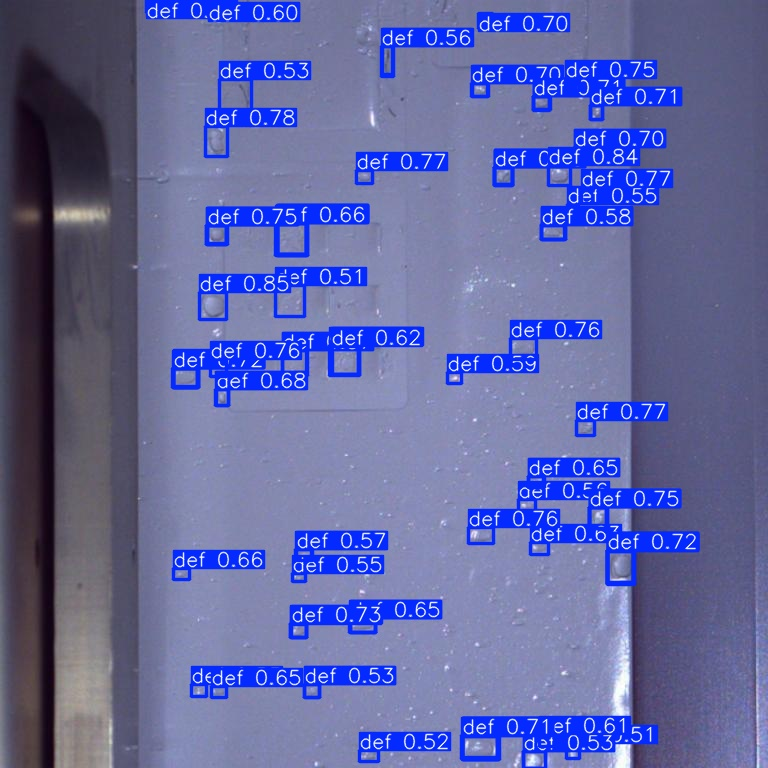

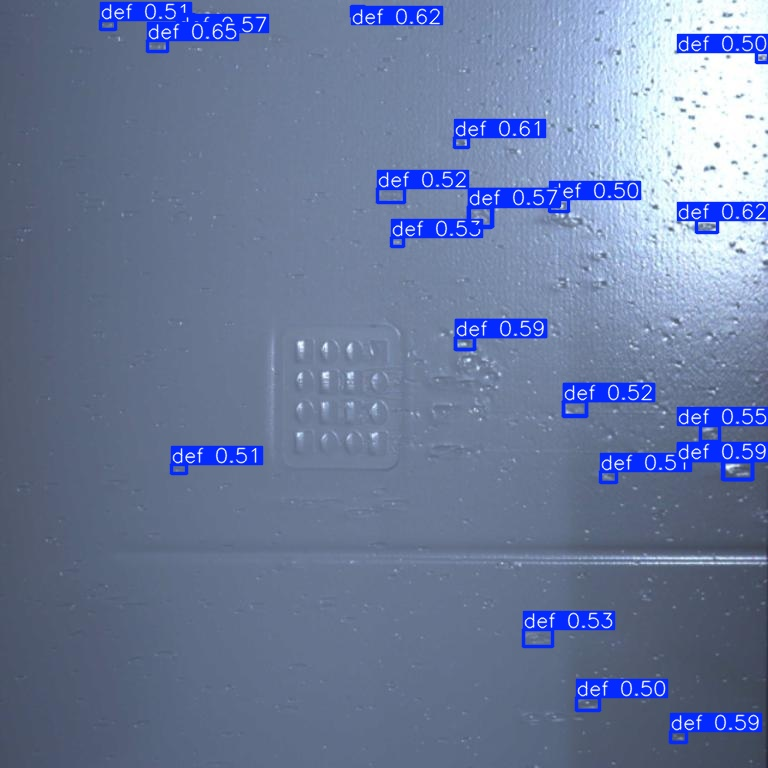

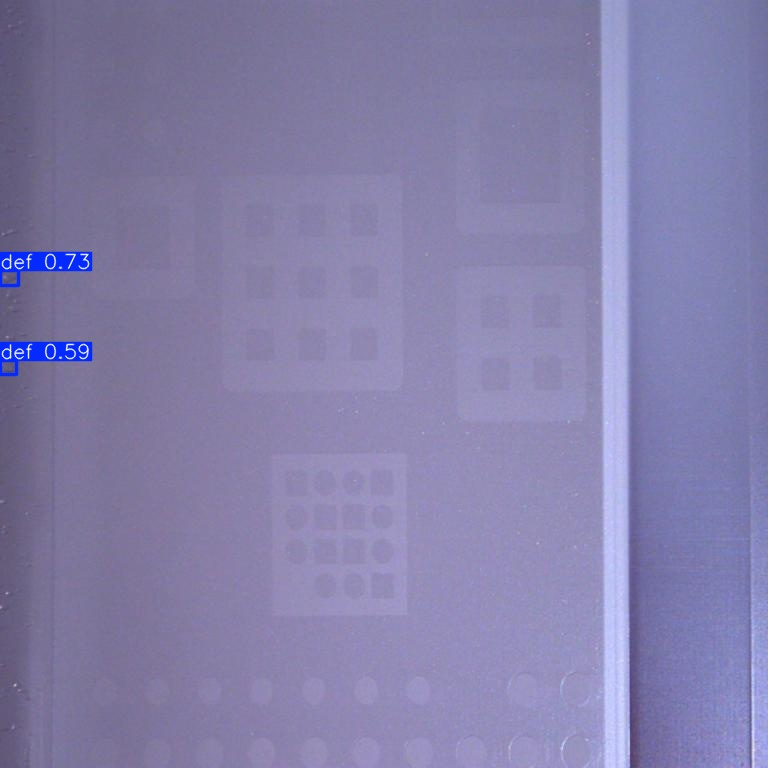

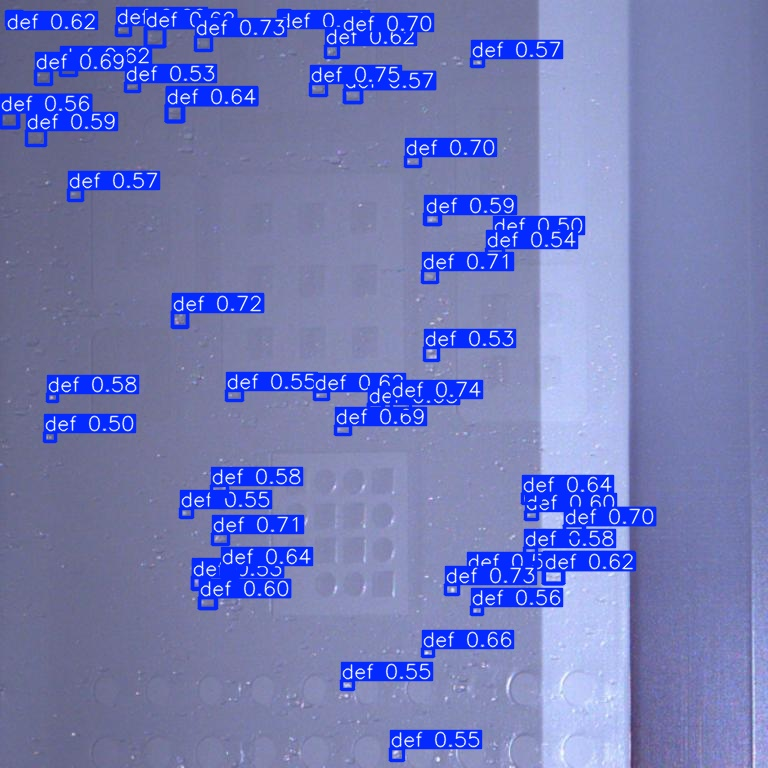

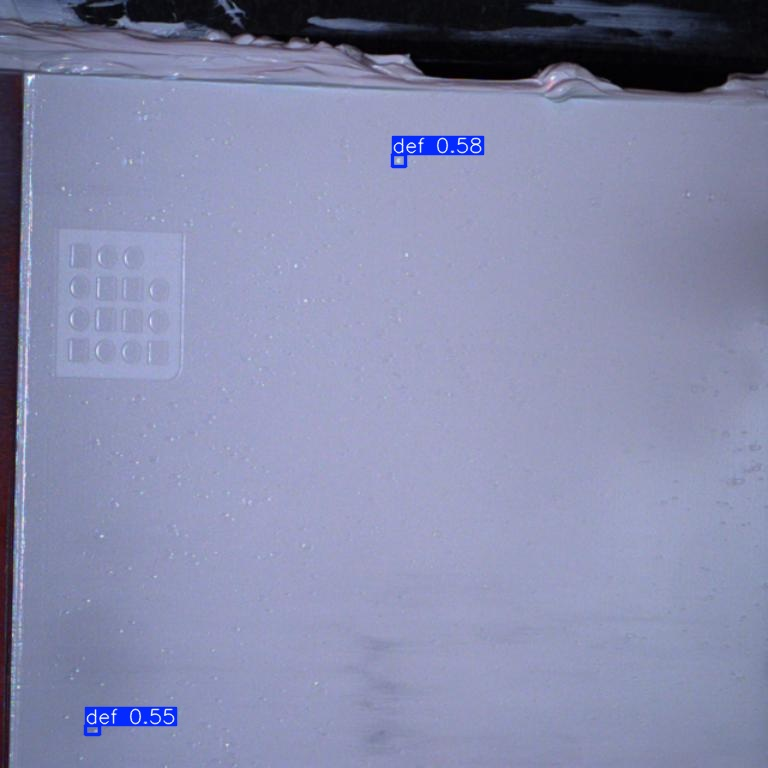

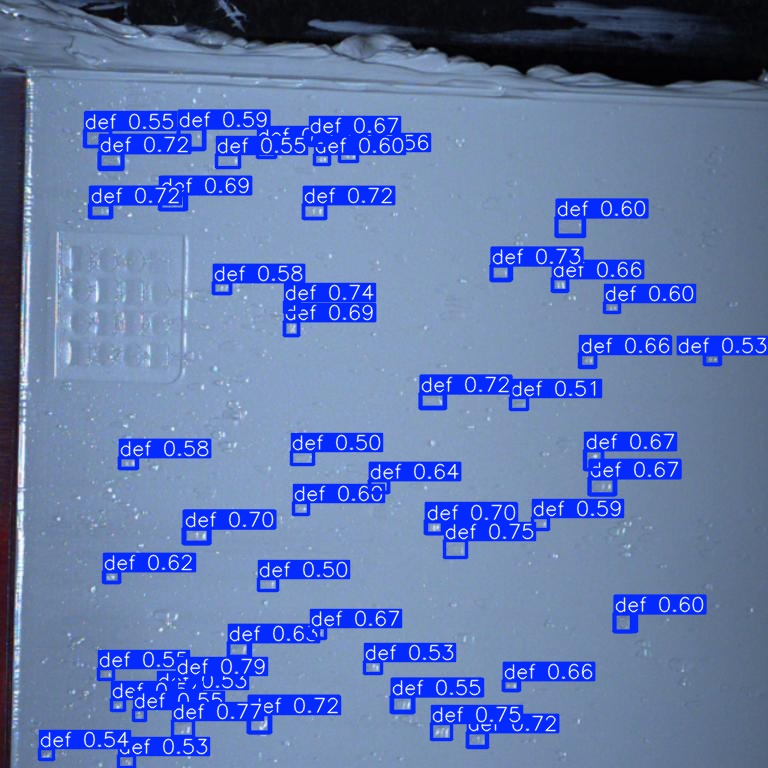

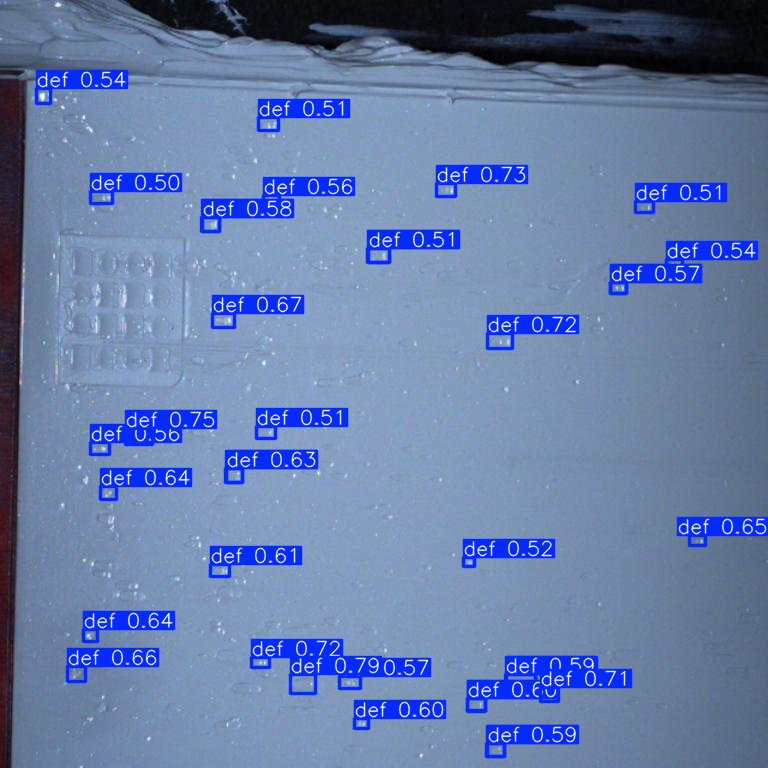

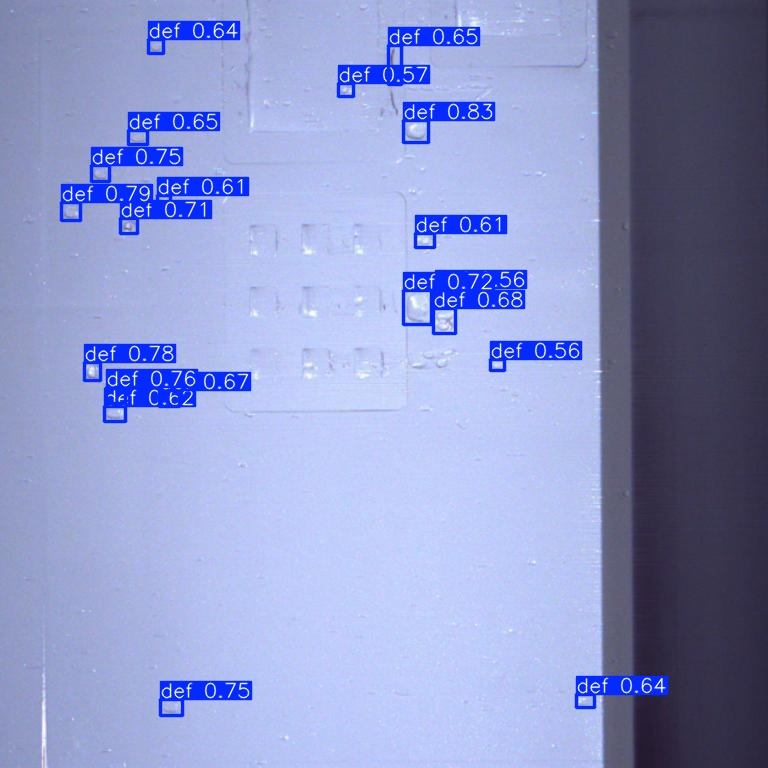

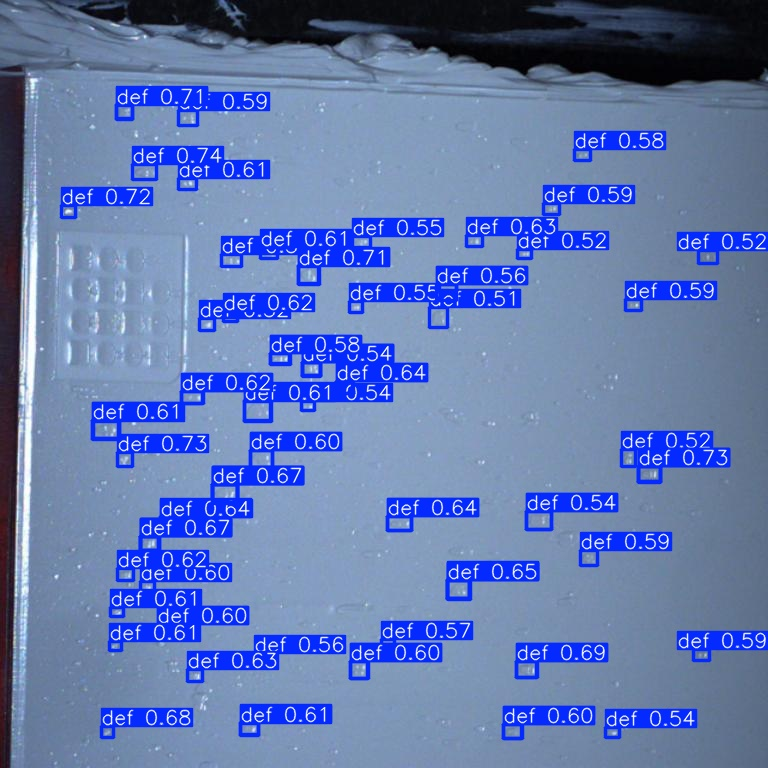

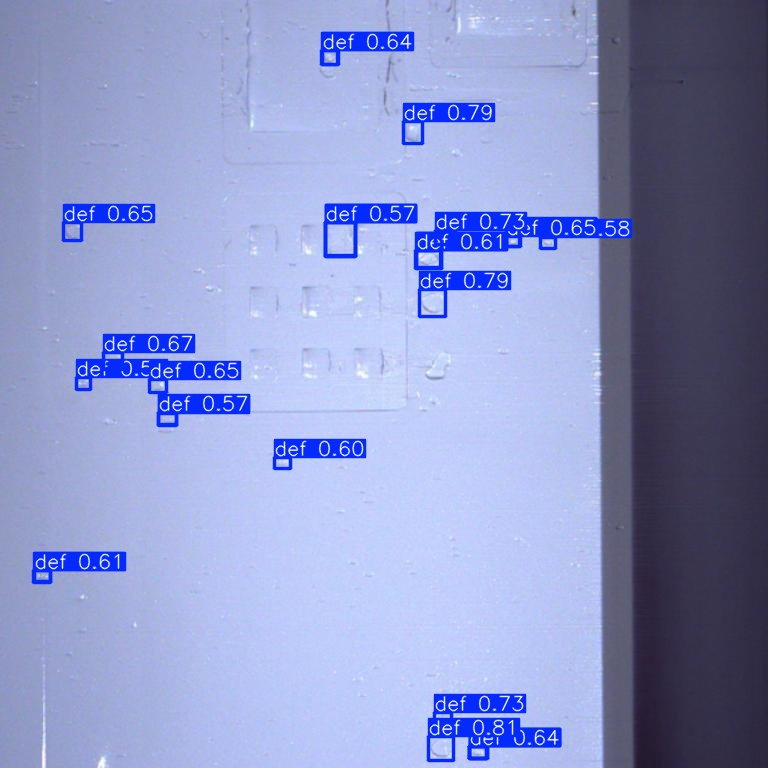

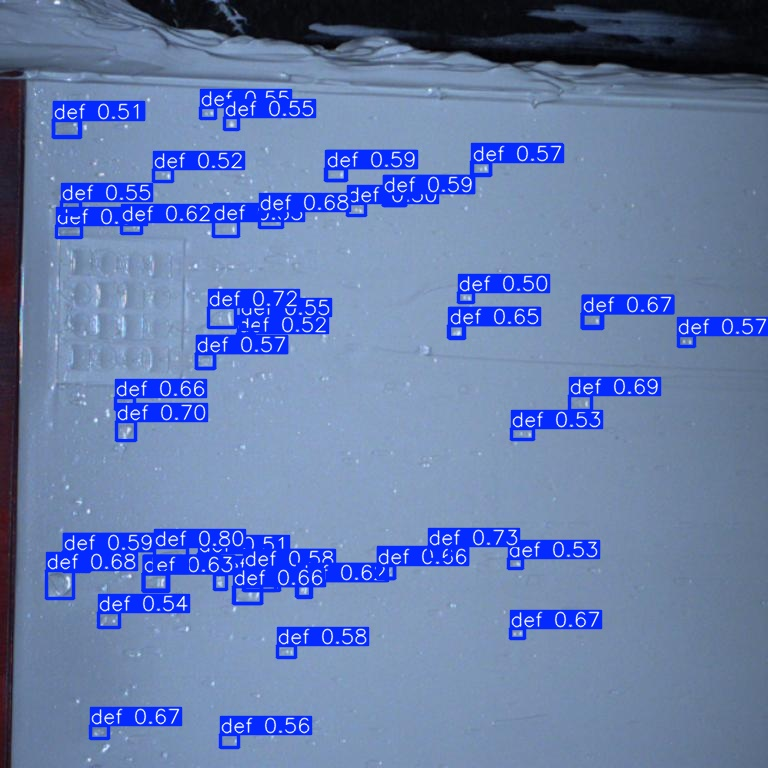

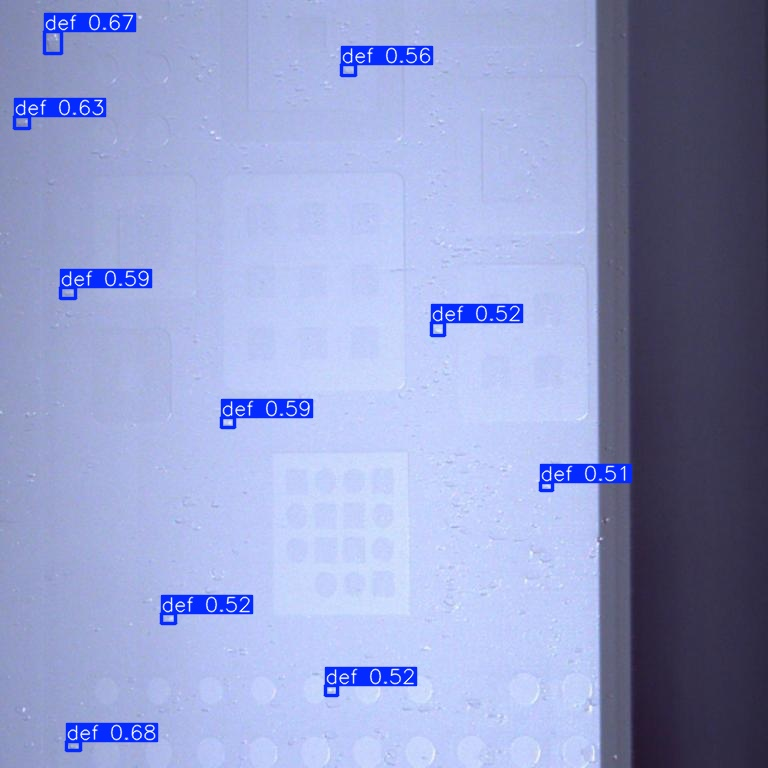

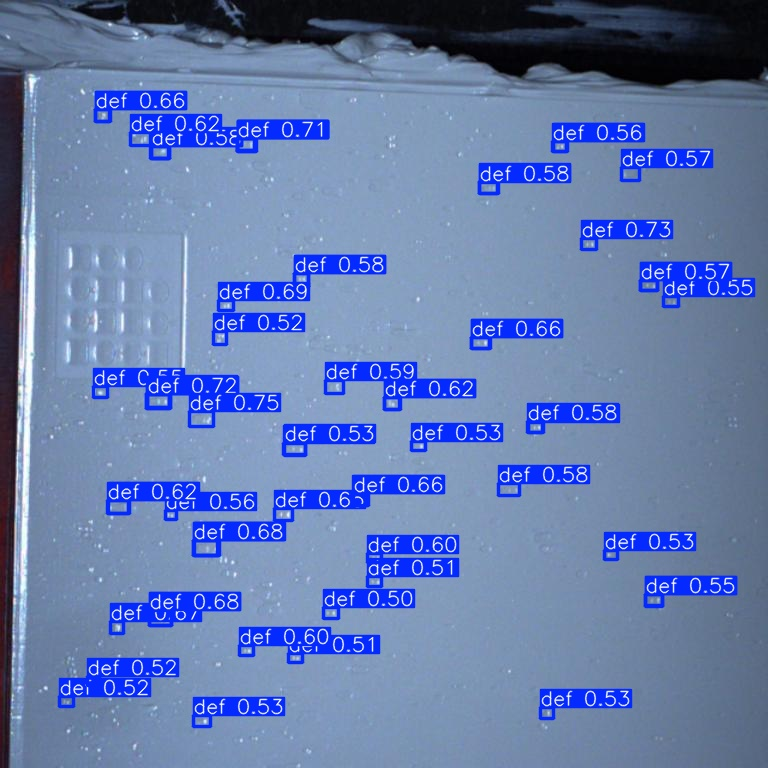

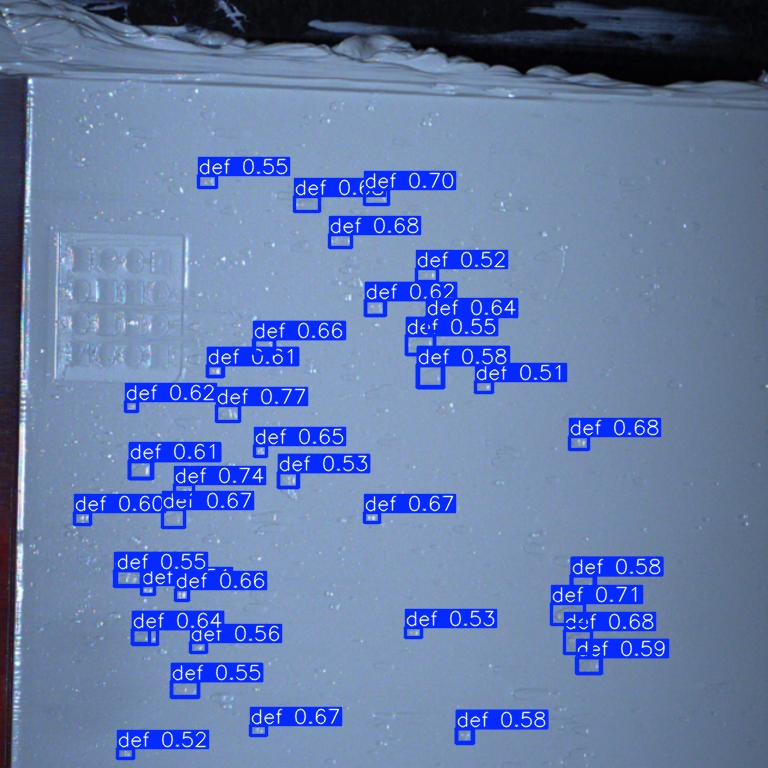

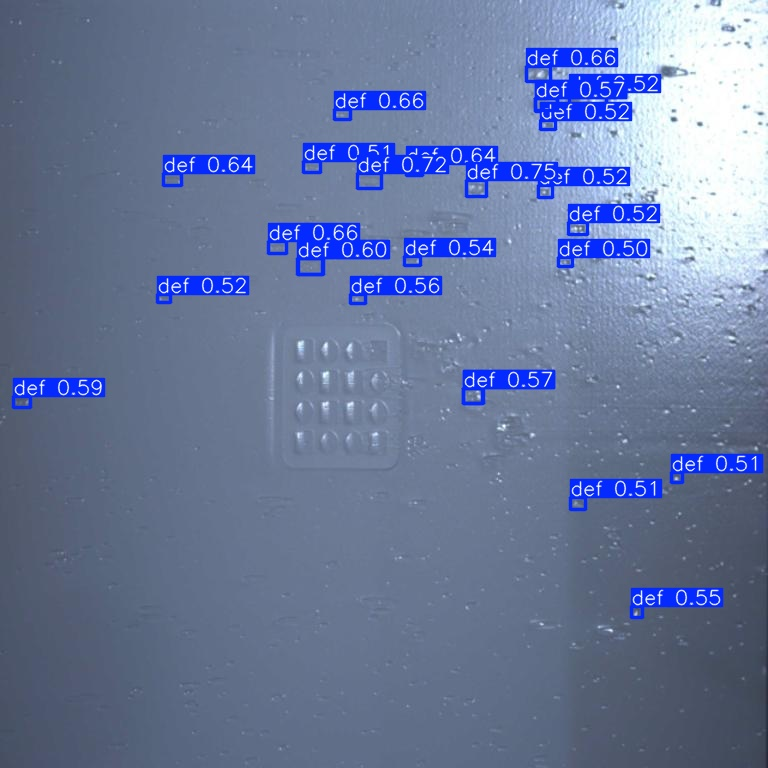

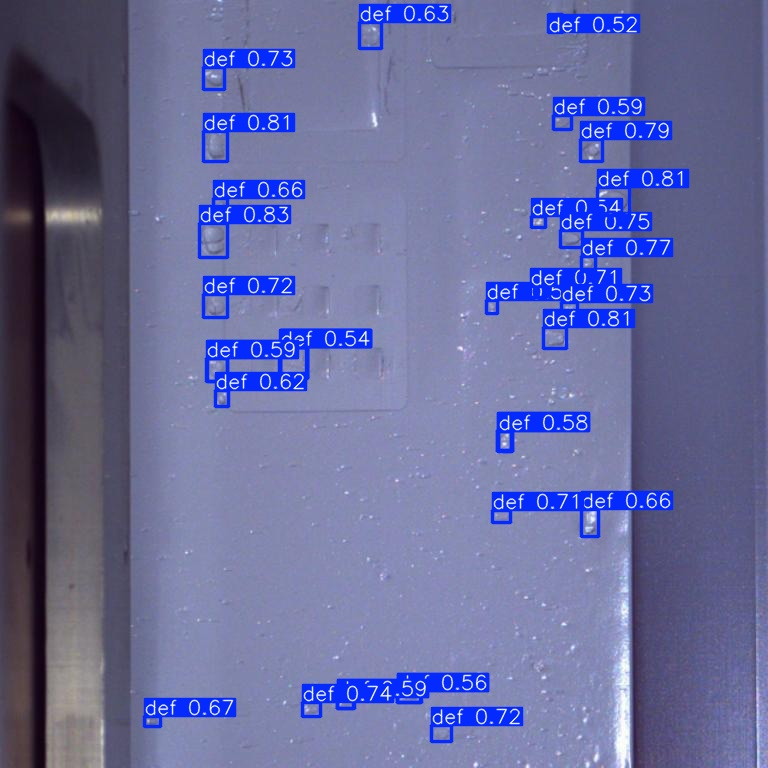

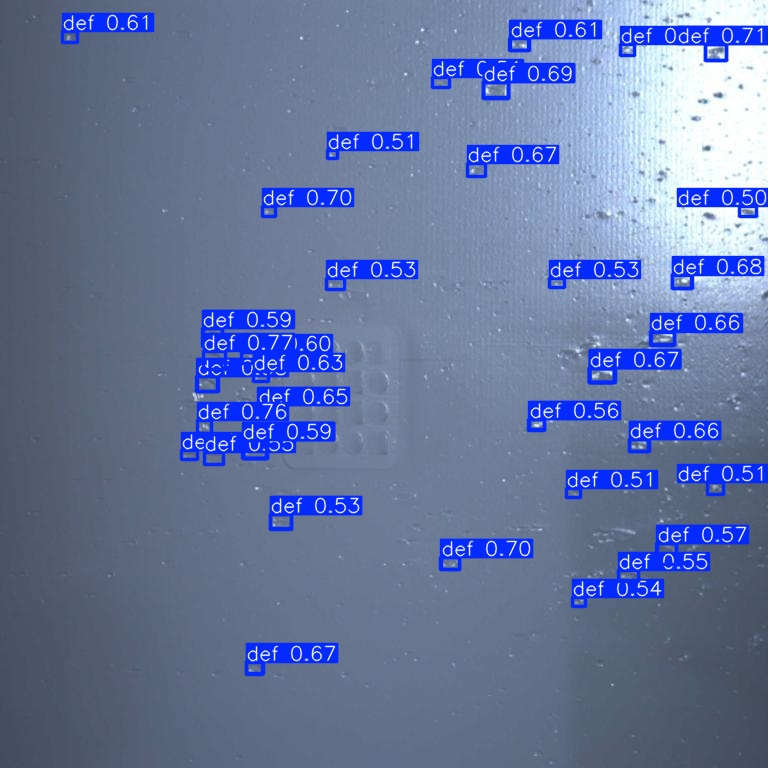

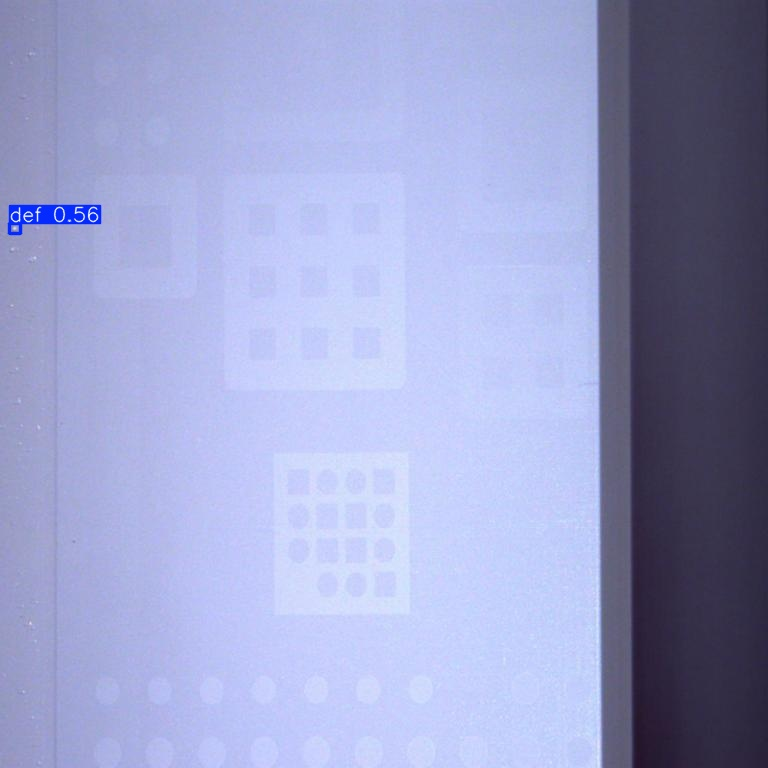

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
from google.colab import files
files.download("/content/runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =========================================================
# 0) DEPENDENCIAS
# =========================================================
!pip -q install ultralytics pycocotools

import os, json, numpy as np
from tqdm import tqdm
from ultralytics import YOLO
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lX9sE2RPQOCv2R7cn0io")
project = rf.workspace("jota22").project("am_boundingbox")
version = project.version(22)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AM_BoundingBox-22 in coco:: 100%|██████████| 233/233 [00:00<00:00, 5872.72it/s]


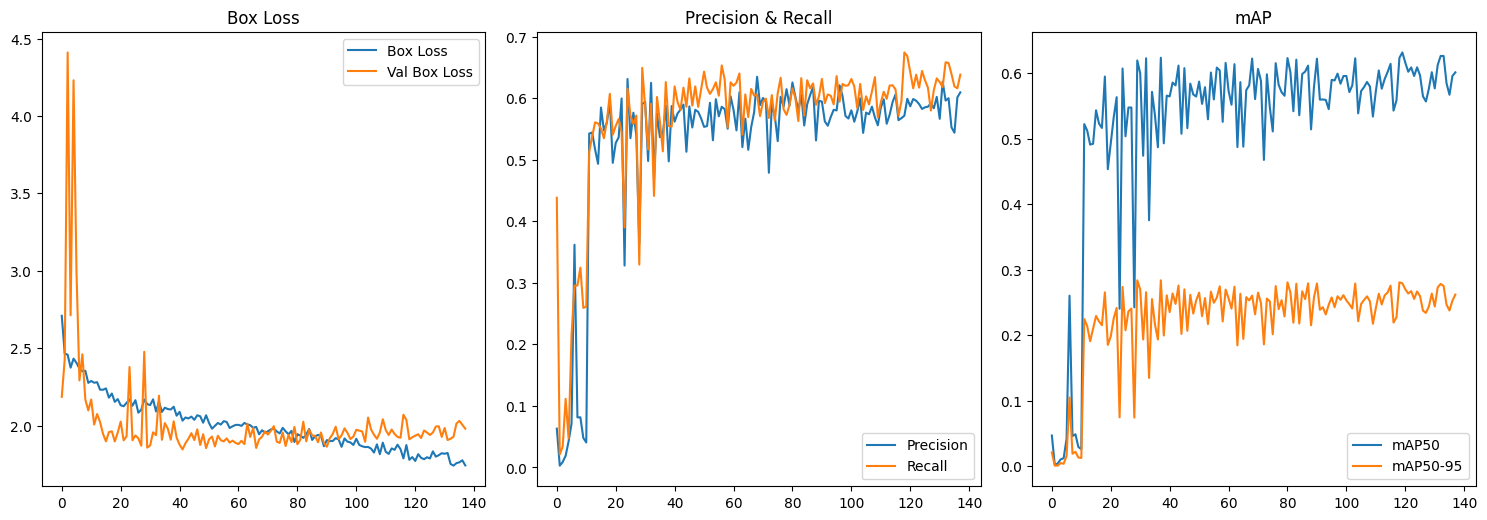

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el CSV con los datos del entrenamiento
df = pd.read_csv('/content/runs/detect/train/results.csv')

# Definir resolución de salida
plt.figure(figsize=(15, 10))  # Más grande = más píxeles

# Graficar algunas métricas
plt.subplot(2, 3, 1)
plt.plot(df['train/box_loss'], label='Box Loss')
plt.plot(df['val/box_loss'], label='Val Box Loss')
plt.legend()
plt.title('Box Loss')

plt.subplot(2, 3, 2)
plt.plot(df['metrics/precision(B)'], label='Precision')
plt.plot(df['metrics/recall(B)'], label='Recall')
plt.legend()
plt.title('Precision & Recall')

plt.subplot(2, 3, 3)
plt.plot(df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.legend()
plt.title('mAP')

plt.tight_layout()
plt.savefig('/content/results_hd.png', dpi=300)  # Guardar en alta resolución
plt.show()

In [ ]:
# =========================================================
# 1) RUTAS / PARÁMETROS
# =========================================================
MODEL_PATH     = "/content/runs/detect/train/weights/best.pt"   # <-- tu modelo YOLO
IMG_DIR        = "/content/AM_BoundingBox-22/valid"            # <-- imágenes VAL
GT_COCO_JSON   = "/content/AM_BoundingBox-22/valid/_annotations.coco.json"      # <-- GT COCO
PRED_COCO_JSON = "/content/yolo_preds_coco_AP50.json"           # <-- salida preds

CONF_THRES     = 0.30     # umbral de confianza (ajústalo si quieres)
IOU_THRES      = 0.50     # evaluamos SOLO IoU=0.50
MAX_DETS       = 300      # similar a Ultralytics


In [ ]:
# =========================================================
# 2) CARGAR MODELO YOLO y CHEQUEAR CLASES
# =========================================================
model = YOLO(MODEL_PATH)
yolo_names = model.model.names  # dict: {cls_idx: "class_name"}
print("Clases YOLO:", yolo_names)

coco_gt = COCO(GT_COCO_JSON)
coco_classes = [c['name'] for c in coco_gt.loadCats(coco_gt.getCatIds())]
print("Clases COCO (GT):", coco_classes)

# Mapeo YOLO -> COCO por nombre (asegúrate de que los nombres coinciden)
name_to_coco_id = {c['name']: c['id'] for c in coco_gt.loadCats(coco_gt.getCatIds())}
yolo_to_coco = {}
missing = []
for idx, name in yolo_names.items():
    if name in name_to_coco_id:
        yolo_to_coco[idx] = name_to_coco_id[name]
    else:
        missing.append(name)

if missing:
    raise ValueError(f"Las siguientes clases de YOLO no están en COCO GT: {missing}")
print("Mapa YOLO->COCO:", yolo_to_coco)

Clases YOLO: {0: 'def'}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Clases COCO (GT): ['DEFECTOS', 'def']
Mapa YOLO->COCO: {0: 1}


In [ ]:
# ========= CONFIG =========
IN_JSON  = "/content/AM_BoundingBox-22/valid/_annotations.coco.json"          # <-- tu GT original
OUT_JSON = "/content/_annotations.coco.cleaned.json"  # <-- salida limpia

import json, os
from collections import defaultdict

def load_json(p):
    with open(p, "r", encoding="utf-8") as f:
        return json.load(f)

def save_json(obj, p):
    with open(p, "w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False)

data = load_json(IN_JSON)

cats = data.get("categories", [])
anns = data.get("annotations", [])
imgs = data.get("images", [])

print(f"📦 Cargado: {IN_JSON}")
print(f" - imágenes:    {len(imgs)}")
print(f" - anotaciones: {len(anns)}")
print(f" - categorías:  {len(cats)}")

# 1) Detectar duplicados por nombre
name_to_ids = defaultdict(list)
for c in cats:
    name_to_ids[c["name"]].append(c["id"])

dupes = {name: ids for name, ids in name_to_ids.items() if len(ids) > 1}
if not dupes:
    print("✅ No hay categorías duplicadas por nombre. (Nada que limpiar)")
    print(f"Guardando copia idéntica en: {OUT_JSON}")
    save_json(data, OUT_JSON)
else:
    print("⚠️ Encontradas categorías duplicadas (nombre -> ids):")
    for n, ids in dupes.items():
        print(f"   - {n}: {sorted(ids)}")

    # 2) Plan de fusión: conservar la ID mínima por cada nombre
    remap = {}   # old_id -> keep_id
    keep_ids = set()
    drop_ids = set()
    for name, ids in dupes.items():
        keep = min(ids)            # conserva la más pequeña
        keep_ids.add(keep)
        for cid in ids:
            if cid != keep:
                remap[cid] = keep
                drop_ids.add(cid)

    print("\n🔁 Remapeos (old_id -> keep_id):")
    for old, new in sorted(remap.items()):
        print(f"   {old} -> {new}")

    # 3) Remapear anotaciones
    changed = 0
    for a in anns:
        cid = a["category_id"]
        if cid in remap:
            a["category_id"] = remap[cid]
            changed += 1
    print(f"\n✍️  Anotaciones actualizadas: {changed}")

    # 4) Eliminar categorías duplicadas del listado
    cleaned_cats = [c for c in cats if c["id"] not in drop_ids]

    # (opcional) Ordenar por id para que quede prolijo
    cleaned_cats = sorted(cleaned_cats, key=lambda c: c["id"])

    # 5) Persistir
    data["categories"]  = cleaned_cats
    data["annotations"] = anns  # ya remapeadas

    save_json(data, OUT_JSON)

    print(f"\n✅ Limpieza completa. Guardado en: {OUT_JSON}")
    print(f" - categorías antes: {len(cats)}  | después: {len(cleaned_cats)}")
    print(f" - ids eliminadas: {sorted(drop_ids)}")

# 6) Verificación rápida: intentar cargar con pycocotools
try:
    from pycocotools.coco import COCO
    coco = COCO(OUT_JSON)
    cat_names = [c["name"] for c in coco.loadCats(coco.getCatIds())]
    print("\n🔍 Verificación COCO (OK):", cat_names)
except Exception as e:
    print("\n❌ Verificación COCO falló:", e)


📦 Cargado: /content/vdssdvsdv-1/valid/_annotations.coco.json
 - imágenes:    46
 - anotaciones: 661
 - categorías:  8
⚠️ Encontradas categorías duplicadas (nombre -> ids):
   - defectos: [0, 4]

🔁 Remapeos (old_id -> keep_id):
   4 -> 0

✍️  Anotaciones actualizadas: 0

✅ Limpieza completa. Guardado en: /content/_annotations.coco.cleaned.json
 - categorías antes: 8  | después: 7
 - ids eliminadas: [4]
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

🔍 Verificación COCO (OK): ['defectos', 'MdC', 'bbg', 'burb', 'desp', 'poro', 'surco']


In [ ]:
# =========================================================
# 3) INFERENCIA y CONVERSIÓN A COCO (xywh)
# =========================================================
img_paths = [os.path.join(IMG_DIR, f)
             for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.jpeg','.png'))]

# Necesitamos image_id exacto del JSON COCO (por file_name)
file2id = {im['file_name']: im['id'] for im in coco_gt.dataset['images']}

def coco_xywh(xyxy):
    x1, y1, x2, y2 = xyxy
    return [float(x1), float(y1), float(x2 - x1), float(y2 - y1)]

coco_preds = []
for p in tqdm(img_paths, desc="Inferencia"):
    file_name = os.path.basename(p)
    if file_name not in file2id:
        # Roboflow a veces reescribe nombres; si pasa, avisa aquí
        print(f"[AVISO] {file_name} no está en el JSON GT. Saltando…")
        continue
    image_id = file2id[file_name]

    res = model.predict(p, conf=CONF_THRES, verbose=False)[0]  # ya filtra por conf
    boxes = res.boxes
    if boxes is None or len(boxes) == 0:
        continue

    for i in range(len(boxes)):
        cls_idx = int(boxes.cls[i])
        conf    = float(boxes.conf[i])
        if conf < CONF_THRES:
            continue
        xyxy = boxes.xyxy[i].tolist()
        coco_preds.append({
            "image_id": image_id,
            "category_id": int(yolo_to_coco[cls_idx]),
            "bbox": coco_xywh(xyxy),
            "score": conf
        })

with open(PRED_COCO_JSON, "w") as f:
    json.dump(coco_preds, f)
print(f"✅ Predicciones guardadas en COCO: {PRED_COCO_JSON}  ({len(coco_preds)} detecciones)")

Inferencia: 100%|██████████| 23/23 [00:03<00:00,  5.81it/s]


✅ Predicciones guardadas en COCO: /content/yolo_preds_coco_AP50.json  (922 detecciones)


In [ ]:
# =========================================================
# 4) EVALUACIÓN COCOeval “ESTILO YOLO” (AP @ IoU=0.50, maxDets=300)
# =========================================================
coco_dt  = coco_gt.loadRes(PRED_COCO_JSON)

e = COCOeval(coco_gt, coco_dt, iouType='bbox')
# Configurar EXACTAMENTE IoU=0.50 y maxDets=300
e.params.imgIds  = coco_gt.getImgIds()
e.params.catIds  = coco_gt.getCatIds()
e.params.iouThrs = np.array([IOU_THRES])    # solo un IoU
e.params.maxDets = [MAX_DETS]              # un único tope de detecciones
# Usamos área 'all' (como YOLO)
e.params.areaRng = [[0**2, 1e5**2]]
e.params.areaRngLbl = ['all']

e.evaluate()
e.accumulate()
# No uses summarize() estándar porque asume los 12 métricos; hacemos lectura manual:
# e.eval['precision'] dims: T x R x K x A x M -> con T=1, A=1, M=1 ahora
prec = e.eval['precision']  # shape (1, R, K, 1, 1)
rec  = e.eval['recall']     # shape (1, K, 1, 1)

# AP50 global (promedio sobre clases y recalls válidos)
ap50 = np.mean(prec[0, prec[0] > -1]) if np.any(prec[0] > -1) else float('nan')
# AR@maxDets global
ar   = np.mean(rec[0, rec[0] > -1])   if np.any(rec[0] > -1)   else float('nan')

print("\n========== Resultados estilo YOLO (COCOeval) ==========")
print(f"AP50 (IoU=0.50, maxDets={MAX_DETS}): {ap50:.3f}")
print(f"AR   (IoU=0.50, maxDets={MAX_DETS}): {ar:.3f}")

# AP50 por clase (opcional)
catIds = e.params.catIds
catId2name = {c['id']: c['name'] for c in coco_gt.loadCats(catIds)}
print("\nAP50 por clase:")
for k, catId in enumerate(catIds):
    p = prec[0, :, k, 0, 0]
    p = p[p > -1]
    ap_k = p.mean() if p.size else float('nan')
    print(f"  - {catId2name[catId]:<10s}: {ap_k:.3f}")


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.00s).

========== Resultados estilo YOLO (COCOeval) ==========
AP50 (IoU=0.50, maxDets=300): 0.503
AR   (IoU=0.50, maxDets=300): 0.607

AP50 por clase:
  - DEFECTOS  : nan
  - def       : 0.503


In [ ]:
# =========================
# 3) EJECUTAR PREDICCIONES
# =========================
# Recolectar rutas de imágenes tal cual están en IMG_DIR
img_paths = [os.path.join(IMG_DIR, f)
             for f in os.listdir(IMG_DIR)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

coco_results = []

# Utilizamos stream=True para no cargar todas las imágenes en memoria
for result in tqdm(model.predict(img_paths, stream=True, verbose=False), total=len(img_paths)):
    # Nombre base del archivo (debería coincidir con file_name en el JSON COCO)
    base = os.path.basename(result.path)
    if base not in fn_to_imgid:
        # Si el file_name en el JSON no incluye carpetas, esto funcionará.
        # Si no hay coincidencia, avisamos y saltamos.
        print(f"⚠️  No se encontró image_id para '{base}'. Se omite.")
        continue
    image_id = fn_to_imgid[base]

    # Dimensiones (para recortar cajas, por si el modelo sale de límites)
    h, w = result.orig_shape

    boxes = result.boxes
    if boxes is None or len(boxes) == 0:
        continue

    # Para cada predicción
    xyxy = boxes.xyxy.cpu().numpy()           # [N, 4] en píxeles
    cls   = boxes.cls.cpu().numpy().astype(int)
    conf  = boxes.conf.cpu().numpy()

    for (x1, y1, x2, y2), c, s in zip(xyxy, cls, conf):
        # nombre de clase desde YOLO
        cls_name = yolo_names.get(int(c), None)
        if cls_name is None:
            continue
        # mapear a category_id de COCO por nombre
        if cls_name not in name_to_catid:
            # Clase del modelo no existe en el JSON COCO → omitir
            continue
        category_id = name_to_catid[cls_name]

        # xyxy -> xywh, recortando a límites de la imagen
        x1 = max(0.0, min(float(x1), w - 1))
        y1 = max(0.0, min(float(y1), h - 1))
        x2 = max(0.0, min(float(x2), w - 1))
        y2 = max(0.0, min(float(y2), h - 1))
        bw = max(0.0, x2 - x1)
        bh = max(0.0, y2 - y1)
        if bw <= 0 or bh <= 0:
            continue

        coco_results.append({
            "image_id": int(image_id),
            "category_id": int(category_id),
            "bbox": [x1, y1, bw, bh],  # COCO: [x, y, width, height]
            "score": float(s)
        })

# Guardar predicciones
with open(PRED_COCO_JSON, "w") as f:
    json.dump(coco_results, f)
print(f"✅ Predicciones COCO guardadas en: {PRED_COCO_JSON} (total: {len(coco_results)})")

  0%|          | 0/23 [00:00<?, ?it/s]


NameError: name 'fn_to_imgid' is not defined

In [ ]:
 #4) EVALUAR CON COCOeval
# =========================
coco_dt = coco_gt.loadRes(PRED_COCO_JSON)

coco_eval = COCOeval(coco_gt, coco_dt, iouType="bbox")
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

# La métrica clave comparable a Ultralytics:
# - mAP@0.50  ≈ coco_eval.stats[1]
# - mAP@0.50:0.95 ≈ coco_eval.stats[0]
print({
    "mAP50-95": coco_eval.stats[0],
    "mAP50": coco_eval.stats[1]
})

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.71s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.503
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.227
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.196
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.014
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.104
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.313
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1